<a href="https://colab.research.google.com/github/adnanakhter11/Sales-Prediction-Using-Regression-Techniques/blob/main/Sales_Forecasting_using_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Prediction Using Regression Techniques

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Client 1/walmart1.csv')
df.head()

,Store,IsHoliday,Dept,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
0,1,0,1,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50
1,1,0,26,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,11737.12
2,1,0,17,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,13223.76
3,1,0,45,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,37.44
4,1,0,28,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1085.29


In [ ]:
df.shape

(196596, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196596 entries, 0 to 196595
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         196596 non-null  int64  
 1   IsHoliday     196596 non-null  int64  
 2   Dept          196596 non-null  int64  
 3   Type          196596 non-null  int64  
 4   Temperature   196596 non-null  float64
 5   Fuel_Price    196596 non-null  float64
 6   MarkDown1     196596 non-null  float64
 7   MarkDown2     196596 non-null  float64
 8   MarkDown3     196596 non-null  float64
 9   MarkDown4     196596 non-null  float64
 10  MarkDown5     196596 non-null  float64
 11  CPI           196596 non-null  float64
 12  Unemployment  196596 non-null  float64
 13  Weekly_Sales  196596 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 21.0 MB


In [ ]:
df.describe()

,Store,IsHoliday,Dept,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Weekly_Sales
count,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000,196596.000000
mean,10.529141,0.069813,43.644103,2.516358,60.349429,3.332516,2847.873829,1056.018997,591.504350,1202.097252,1699.899753,178.128650,7.588137,17994.724733
std,5.790181,0.254833,29.732729,0.499734,18.507802,0.453028,6305.998602,6084.344814,6477.732256,4030.240563,3735.484697,40.226660,1.653229,25523.908583
min,1.000000,0.000000,1.000000,2.000000,6.230000,2.514000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,-1699.000000
25%,6.000000,0.000000,19.000000,2.000000,47.170000,2.902000,0.000000,0.000000,0.000000,0.000000,0.000000,131.136000,6.529000,2739.637500
50%,11.000000,0.000000,36.000000,3.000000,62.530000,3.407000,0.000000,0.000000,0.000000,0.000000,0.000000,192.422595,7.382000,8528.710000
75%,16.000000,0.000000,71.000000,3.000000,74.880000,3.701000,3504.090000,9.940000,5.580000,646.200000,2447.920000,215.126827,8.185000,22202.570000
max,20.000000,1.000000,99.000000,3.000000,99.220000,4.468000,78124.500000,104519.540000,141630.610000,57817.560000,58068.140000,227.232807,14.313000,693099.360000


In [ ]:
df.dtypes

Store             int64
IsHoliday         int64
Dept              int64
Type              int64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
Weekly_Sales    float64
dtype: object

In [ ]:
df.rename(columns={"Weekly_Sales": "Sales"}, inplace=True)
df.head()

,Store,IsHoliday,Dept,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Sales
0,1,0,1,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50
1,1,0,26,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,11737.12
2,1,0,17,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,13223.76
3,1,0,45,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,37.44
4,1,0,28,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1085.29


In [ ]:
df.columns

Index(['Store', 'IsHoliday', 'Dept', 'Type', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Sales'],
      dtype='object')

In [ ]:
df.isnull()

,Store,IsHoliday,Dept,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Sales
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196591,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196592,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196593,False,False,False,False,False,False,False,False,False,False,False,False,False,False
196594,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.isnull().sum()

Store           0
IsHoliday       0
Dept            0
Type            0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Sales           0
dtype: int64

In [ ]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
196591    False
196592    False
196593    False
196594    False
196595    False
Length: 196596, dtype: bool

In [ ]:
sns.distplot(df["Sales"])

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'IsHoliday'}>,
        <Axes: title={'center': 'Dept'}>,
        <Axes: title={'center': 'Type'}>],
       [<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Fuel_Price'}>,
        <Axes: title={'center': 'MarkDown1'}>,
        <Axes: title={'center': 'MarkDown2'}>],
       [<Axes: title={'center': 'MarkDown3'}>,
        <Axes: title={'center': 'MarkDown4'}>,
        <Axes: title={'center': 'MarkDown5'}>,
        <Axes: title={'center': 'CPI'}>],
       [<Axes: title={'center': 'Unemployment'}>,
        <Axes: title={'center': 'Sales'}>, <Axes: >, <Axes: >]],
      dtype=object)

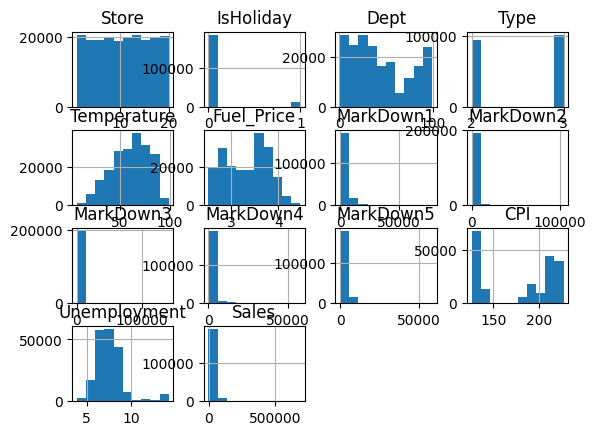

In [ ]:
df.hist()

<Axes: >

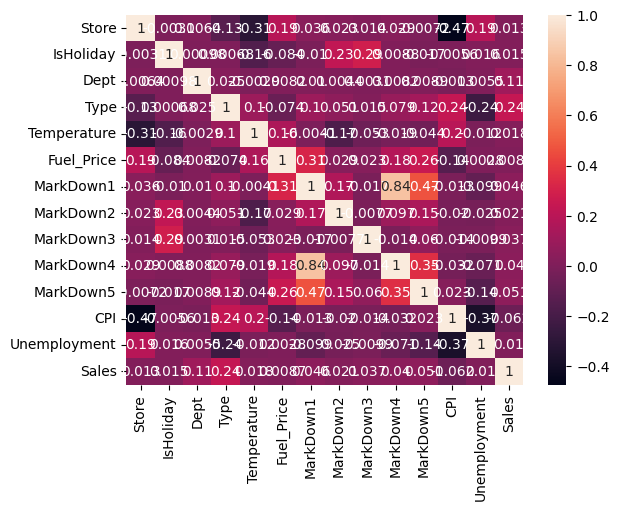

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.head()

,Store,IsHoliday,Dept,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Sales
0,1,0,1,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,24924.50
1,1,0,26,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,11737.12
2,1,0,17,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,13223.76
3,1,0,45,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,37.44
4,1,0,28,3,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,1085.29


In [ ]:
df.tail()

,Store,IsHoliday,Dept,Type,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Sales
196591,20,0,94,3,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.15159,7.293,59836.84
196592,20,0,67,3,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.15159,7.293,16394.56
196593,20,0,37,3,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.15159,7.293,4735.38
196594,20,0,22,3,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.15159,7.293,11996.42
196595,20,0,52,3,60.04,3.882,10813.19,22.33,102.91,867.39,1671.76,216.15159,7.293,2562.04


In [ ]:
 df.columns

Index(['Store', 'IsHoliday', 'Dept', 'Type', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Sales'],
      dtype='object')

In [ ]:
df1=df.copy()

In [ ]:
df1.columns

Index(['Store', 'IsHoliday', 'Dept', 'Type', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Sales'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196596 entries, 0 to 196595
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         196596 non-null  int64  
 1   IsHoliday     196596 non-null  int64  
 2   Dept          196596 non-null  int64  
 3   Type          196596 non-null  int64  
 4   Temperature   196596 non-null  float64
 5   Fuel_Price    196596 non-null  float64
 6   MarkDown1     196596 non-null  float64
 7   MarkDown2     196596 non-null  float64
 8   MarkDown3     196596 non-null  float64
 9   MarkDown4     196596 non-null  float64
 10  MarkDown5     196596 non-null  float64
 11  CPI           196596 non-null  float64
 12  Unemployment  196596 non-null  float64
 13  Sales         196596 non-null  float64
dtypes: float64(10), int64(4)
memory usage: 21.0 MB


In [ ]:
x=df1.iloc[0:10000,0:13].values
print(x)

[[1.00000000e+00 0.00000000e+00 1.00000000e+00 ... 0.00000000e+00
  2.11096358e+02 8.10600000e+00]
 [1.00000000e+00 0.00000000e+00 2.60000000e+01 ... 0.00000000e+00
  2.11096358e+02 8.10600000e+00]
 [1.00000000e+00 0.00000000e+00 1.70000000e+01 ... 0.00000000e+00
  2.11096358e+02 8.10600000e+00]
 ...
 [1.00000000e+00 0.00000000e+00 5.00000000e+00 ... 3.62614000e+03
  2.23181477e+02 6.57300000e+00]
 [1.00000000e+00 0.00000000e+00 9.20000000e+01 ... 3.62614000e+03
  2.23181477e+02 6.57300000e+00]
 [1.00000000e+00 0.00000000e+00 2.60000000e+01 ... 3.62614000e+03
  2.23181477e+02 6.57300000e+00]]


In [ ]:
y=df1.iloc[0:10000, 13].values
print(y)

[ 24924.5   11737.12  13223.76 ...  25508.81 159459.88   8784.99]


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train

array([[1.00000000e+00, 0.00000000e+00, 3.10000000e+01, ...,
        4.32519000e+03, 2.21941295e+02, 6.90800000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.00000000e+00, ...,
        0.00000000e+00, 2.11223533e+02, 7.78700000e+00],
       [1.00000000e+00, 0.00000000e+00, 2.60000000e+01, ...,
        0.00000000e+00, 2.11100385e+02, 7.78700000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 8.20000000e+01, ...,
        0.00000000e+00, 2.15361109e+02, 7.96200000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+01, ...,
        0.00000000e+00, 2.10439123e+02, 7.80800000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.10000000e+01, ...,
        3.71938000e+03, 2.19892526e+02, 7.34800000e+00]])

In [ ]:
x_test

array([[1.00000000e+00, 0.00000000e+00, 1.60000000e+01, ...,
        0.00000000e+00, 2.17045368e+02, 7.86600000e+00],
       [1.00000000e+00, 0.00000000e+00, 4.00000000e+00, ...,
        0.00000000e+00, 2.15796004e+02, 7.68200000e+00],
       [1.00000000e+00, 0.00000000e+00, 3.00000000e+00, ...,
        0.00000000e+00, 2.11235144e+02, 7.78700000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 5.60000000e+01, ...,
        5.50984000e+03, 2.21059189e+02, 7.34800000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.30000000e+01, ...,
        0.00000000e+00, 2.10617093e+02, 7.80800000e+00],
       [1.00000000e+00, 0.00000000e+00, 8.10000000e+01, ...,
        1.44618200e+04, 2.18961846e+02, 7.86600000e+00]])

In [ ]:
y_train

array([ 3477.27, 39773.71,  5830.68, ..., 18346.17, 29091.15,   297.5 ])

In [ ]:
y_test

array([14309.01, 37827.69, 16930.62, ...,  8541.45, 38569.83, 29622.19])

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
k_best = SelectKBest(score_func=f_regression)  # You can also use a different score_func depending on your problem
x_train_kbest = k_best.fit_transform(x_train_scaled, y_train_scaled.ravel())
x_test_kbest = k_best.transform(x_test_scaled)


In [ ]:
# Get the selected feature indices
selected_feature_indices = k_best.get_support(indices=True)
print(selected_feature_indices)


[ 1  2  4  5  6  8  9 10 11 12]


In [ ]:
from sklearn.preprocessing import StandardScaler
ss_x=StandardScaler()
ss_y=StandardScaler()
x_train_scaled=ss_x.fit_transform(x_train)
x_test_scaled=ss_x.fit_transform(x_test)
y_train_scaled=ss_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled=ss_y.fit_transform(y_test.reshape(-1, 1))

In [ ]:
print(x_train_scaled.shape)
print(x_test_scaled.shape)
print(y_train_scaled.shape)
print(y_test_scaled.shape)

(8000, 13)
(2000, 13)
(8000, 1)
(2000, 1)


In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x_train_scaled, y_train_scaled.ravel())  #
pred=regressor.predict(x_test_scaled)
y_pred=ss_y.inverse_transform(pred.reshape(-1, 1)) 
y_pred_test=ss_y.inverse_transform(y_test_scaled.reshape(-1, 1))   
print(y_pred)

[[15182.38084857]
 [24370.87333559]
 [23752.09838341]
 ...
 [ 6427.68325967]
 [16864.1422941 ]
 [20558.67213786]]


In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_pred_test, y_pred)*100
print(score)

28.62095991579


In [ ]:
#Gradient Boosting Regression and Score
from sklearn.ensemble import GradientBoostingRegressor
grb = GradientBoostingRegressor()
grb.fit(x_train, y_train.ravel())
Gpred = grb.predict(x_test)
# print(y_pred)


In [ ]:
sc2=r2_score(y_test,Gpred)
print('Score of Gradient Boosting Regression:',sc2)

Score of Gradient Boosting Regression: 0.9169163470018411


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# norm=MinMaxScaler()
# df["new_Store"]=norm.fit_transform(df[["Store"]])
# df["new_IsHoliday"]=norm.fit_transform(df[["IsHoliday"]])
# df["new_Dept"]=norm.fit_transform(df[["Dept"]])
# df["new_Type"]=norm.fit_transform(df[["Type"]])
# df["new_Temperature"]=norm.fit_transform(df[["Temperature"]])
# df["new_Fuel_Price"]=norm.fit_transform(df[["Fuel_Price"]])
# df["new_MarkDown1"]=norm.fit_transform(df[["MarkDown1"]])
# df["new_MarkDown2"]=norm.fit_transform(df[["MarkDown2"]])
# df["new_MarkDown3"]=norm.fit_transform(df[["MarkDown3"]])
# df["new_MarkDown4"]=norm.fit_transform(df[["MarkDown4"]])
# df["new_MarkDown5"]=norm.fit_transform(df[["MarkDown5"]])
# df["new_CPI"]=norm.fit_transform(df[["CPI"]])
# df["new_Unemployment"]=norm.fit_transform(df[["Unemployment"]])
# df["new_Sales"]=norm.fit_transform(df[["Sales"]])
# df.head()


In [ ]:
# #Subset the original features based on the selected indices
# selected_features = x.columns[selected_feature_indices]
# print(selected_features)